<h2><font color="#004D7F" size=6>Venta de producto bancario</font></h2>

---

In [1]:
# Ajustar la pantalla para una mayor comodidad
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

C:\Users\User\AppData\Local\Temp\ipykernel_772\2732610957.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


---

# <font color="#004D7F"> 1. Introducción</font>

El objetivo de este problema es predecir si un cliente aceptará o rechará una oferta de ahorro a plazo fijo en una entidad bancaria, teniendo datos demograficos como: edad, trabajo, estado civil y el nivel de educación. asi como tambien detalles financieros como: si el cliente tiene un prétamos hipotecario o un préstamo personal entre otras caracteristicas.
El resultado a predecir, denominado "ACEPTACIÓN", es binario, con "1" indicando que el cliente acepta la oferta realizada y "0" mostrando el rechazo de ella.

DICCIONARIO DE DATOS
* ID - código identificador del cliente
* EDAD - edad del cliente
* TRABAJO - tipo de trabajo que desempeña el cliente
* ESTADO_CIVIL - estado civil
* EDUCACION - nivel educativo
* INCUMPLIMIENTO - ¿tiene un crédito incumplido en el pasado?
* VIVIENDA - ¿tiene un crédito hipotecario?
* PRESTAMO - ¿tiene un préstamo personal?
* TIPO_CONTACTO - tipo de contacto registrado en la base de datos
* MES - Mes en el cual se llevó a cabo la campaña evaluada.
* CAMPANA - cantidad de contactos telefónicos que se tuvieron con el cliente en los últimos 6 meses previos al inicio de la campaña.
* NRO_DIAS_CONTACTO - número de días que pasaron desde el último contacto de la campaña anterior
* CONTACTOS_PREVIOS - número de contactos telefónicos realizados en la campaña previa
* RESULT_PREVIO - resultado de la campaña anterior
* TASA_VAR_EMP - Variable macroeconómica - tasa de variación del empleo
* IPC - Variable macroeconómica - indice de precios al consumidor al mes previo.
* ICC - Variable macroeconómica - indice de confianza del consumidor al mes previo.
* INGRESO - ingresos netos al mes previo.
* MONTO_DEUDA - monto de la deuda total de cliente al mes previo.
* MONTO_TRANSAC - monto de las transacciones de tarjeta de crédito del mes anterior
* ACEPTACION - variable target: resultado de la campaña actual (acepta=1, rechaza=0)

## <font color="#004D7F"> 1.1. Importar librerías</font>

In [155]:
# Cargar librerías

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Tratamiento de datos
import numpy as np
import pandas as pd

# Visualizar todas las columnas en pandas
pd.set_option("display.max_columns", None)

# Limitar el número de filas a 100
pd.set_option("display.max_rows", 100)

# Selección, optimización y metricas del modelo
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

## <font color="#004D7F"> 1.2. Cargar el dataset</font>

In [156]:
filename = 'data/base_train.csv'
dataset = pd.read_csv(filename)
dataset.head(5)

,ID,EDAD,TRABAJO,ESTADO_CIVIL,EDUCACION,INCUMPLIMIENTO,VIVIENDA,PRESTAMO,TIPO_CONTACTO,MES,CAMPANA,NRO_DIAS_CONTACTO,CONTACTOS_PREVIOS,RESULT_PREVIO,TASA_VAR_EMP,IPC,ICC,INGRESO,MONTO_DEUDA,MONTO_TRANSAC,ACEPTACION
0,24004,27,self-employed,single,university.degree,no,no,no,telephone,aug,1,999,0,nonexistent,-0.1,93.798,-40.4,1285.0,24260.77053,5242.101608,0
1,24003,43,technician,single,professional.course,no,no,no,telephone,aug,1,999,0,nonexistent,-0.1,93.798,-40.4,1287.0,28980.09457,5538.942316,0
2,23998,44,admin.,married,high.school,no,yes,no,telephone,aug,1,999,0,nonexistent,-0.1,93.798,-40.4,1153.0,10937.49426,7630.664800,0
3,24005,46,admin.,divorced,high.school,no,yes,no,telephone,aug,1,999,0,nonexistent,-0.1,93.798,-40.4,1125.0,29232.60368,7008.855259,0
4,23999,42,admin.,married,high.school,no,yes,yes,telephone,aug,1,999,0,nonexistent,-0.1,93.798,-40.4,1443.0,32636.30279,3012.416629,1


In [157]:
# Dimensión de los datos
dataset.shape

(31478, 21)

* Observamos un total de 31478 filas y 21 columnas

---

# <font color="#004D7F"> 2. Estadística descriptiva</font>

## <font color="#004D7F"> 2.1. Resumen estadístico</font>

In [158]:
dataset.describe()

,ID,EDAD,CAMPANA,NRO_DIAS_CONTACTO,CONTACTOS_PREVIOS,TASA_VAR_EMP,IPC,ICC,INGRESO,MONTO_DEUDA,MONTO_TRANSAC,ACEPTACION
count,31478.000000,31478.000000,31478.000000,31478.000000,31478.000000,31478.000000,31478.000000,31478.000000,31478.000000,31478.000000,31478.000000,31478.000000
mean,20608.759483,40.398564,2.561821,962.339316,0.175011,0.080227,93.575255,-40.493786,3925.925766,19979.004011,4993.390249,0.112269
std,11885.434509,12.424505,2.748777,187.259314,0.497886,1.572548,0.577415,4.633156,3944.943836,8406.880028,2095.882939,0.315702
min,1.000000,5.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,1125.000000,6346.668502,1586.665139,0.000000
25%,10246.500000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1323.738750,12281.898450,3073.522667,0.000000
50%,20626.500000,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,1495.505098,19912.991845,4995.885151,0.000000
75%,30875.750000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,7214.622980,27675.874565,6905.815363,0.000000
max,41188.000000,160.000000,56.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,16463.000000,33653.594950,8413.137461,1.000000


**Observaciones**
* La variable `EDAD`, tiene como valor mínimo 5 y valor máximo 160, lo cual es poco probable.
* La variable `CAMPANA`, tiene como valor máximo 56 llamadas y como valor mínimo 1, es porible que a los clientes que se les realizó muchas llamadas son muy poco probables a que paguen  .
* La variable `NRO_DIAS_CONTACTO`, tiene hasta un 75% de valores 999, un posible error o quizá un codigo para designar que no hubo contacto(es poco probable que se lleven muchos días de una campaña a otra), con casi 3 años.
* la variable `CONTACTOS_PREVIOS`, el 75% de los valores son 0 y tambien el número máximo de contactos son 6, lo cual me indica que que la mayoria de clientes no fueron contactados en la campaña anterior.

## <font color="#004D7F"> 2.2. Distribución de clase</font>

In [159]:
dataset.groupby('ACEPTACION').size()

ACEPTACION
0    27944
1     3534
dtype: int64

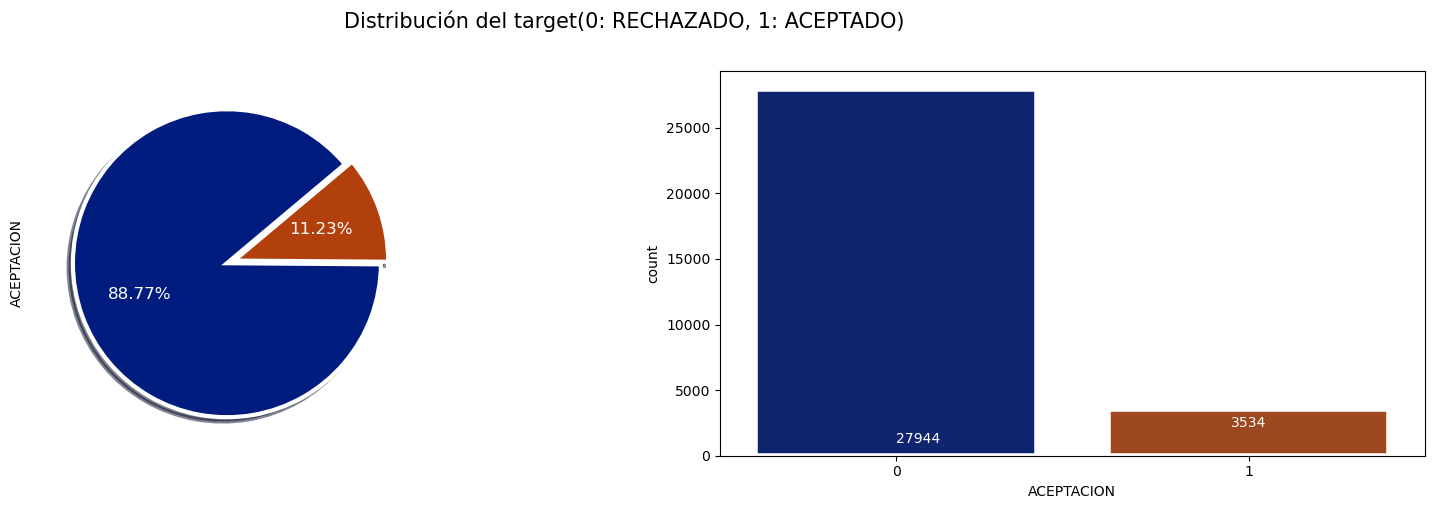

In [160]:
# Forma de gráfico
f,ax= plt.subplots(1,2,figsize=(20,5))
sns.countplot(data = dataset, x='ACEPTACION', ax=ax[1],palette='dark',edgecolor='white', linewidth=4)
dataset['ACEPTACION'].value_counts().plot.pie(autopct='%.2f%%',explode=[0,0.05], ax=ax[0],colors=sns.color_palette('dark'),shadow = 'True',
        startangle = 40,
        textprops = {'color': 'White','fontsize':12},
        wedgeprops = {'linewidth':3,'edgecolor':'white'},
        rotatelabels = 'true')
ax[1].text(x=0,y=1000,s=dataset['ACEPTACION'].value_counts()[0], color='white')
ax[1].text(x=1,y=2500,s=dataset['ACEPTACION'].value_counts()[1], color='white', va='center', ha='center')
f.suptitle('Distribución del target(0: RECHAZADO, 1: ACEPTADO)',y=0.98,ha='center',va='center',size=15, weight=150)
plt.show()

* Notamos una diferencia muy alta y por lo tanto sesgada
* Se tendría que extraer una porción de los valores de "0" o usar un técnica para aumentar el peso de la opción "1"

## <font color="#004D7F"> 2.3. Tipo de datos</font>

In [161]:
dataset.dtypes

ID                     int64
EDAD                   int64
TRABAJO               object
ESTADO_CIVIL          object
EDUCACION             object
INCUMPLIMIENTO        object
VIVIENDA              object
PRESTAMO              object
TIPO_CONTACTO         object
MES                   object
CAMPANA                int64
NRO_DIAS_CONTACTO      int64
CONTACTOS_PREVIOS      int64
RESULT_PREVIO         object
TASA_VAR_EMP         float64
IPC                  float64
ICC                  float64
INGRESO              float64
MONTO_DEUDA          float64
MONTO_TRANSAC        float64
ACEPTACION             int64
dtype: object

### <font color="#004D7F"> Valores NaN</font>
Mi criterio para valores nulos es:
* Si la cantidad de valores nulos esta comprendido entre 0 a 10%, podemos usar una forma de imputación tradicional como la media, mediana en caso de regresión y moda en caso de clasificación.
* Si la cantidad de valores nulos esta entre 10% hasta un 30%, podemos usar una imputación KNNImputer, la cual utiliza la tecnica k-Nearest Neighbors para hacer la imputación.
* Si la cantidad de valores nulo es mayor al 30%, se puede pensar en considerar eliminar la columna.

In [162]:
# separo las características del target
feature_data = dataset.drop('ACEPTACION',1)
feature_target = dataset['ACEPTACION']

# calculamos el número y el porcentaje de cada columna
cantidad_nulos = feature_data.isnull().sum()
porcentaje_nulos = feature_data.isnull().mean()

# A formato porcentaje STR
porcentaje_nulos = (porcentaje_nulos * 100).round(2).astype(str) + '%'

# Combinamos los resultados
nulos = pd.DataFrame({'Cantidad': cantidad_nulos, 'Porcentaje': porcentaje_nulos})
nulos

,Cantidad,Porcentaje
ID,0,0.0%
EDAD,0,0.0%
TRABAJO,0,0.0%
ESTADO_CIVIL,0,0.0%
EDUCACION,0,0.0%
INCUMPLIMIENTO,0,0.0%
VIVIENDA,0,0.0%
PRESTAMO,0,0.0%
TIPO_CONTACTO,0,0.0%
MES,0,0.0%


* No tenemos valores nulos

In [163]:
# Analisis de duplicados
duplicados = dataset.duplicated().sum()
duplicados


0

No hay valores duplicados

---

# <font color="#004D7F"> 3. Visualización del conjunto de datos</font>

In [164]:
#selección de variables categóricas y numericas
df_categoricas = dataset.select_dtypes(include=['object']).columns.to_list()
df_numericas = dataset.select_dtypes(include=['float64', 'int64']).columns.to_list()

print("\033[1m" + 'Variables categoricas' + "\033[0m\n", df_categoricas)
print("\033[1m" + 'Variables numericas' + "\033[0m\n", df_numericas)



Variables categoricas
 ['TRABAJO', 'ESTADO_CIVIL', 'EDUCACION', 'INCUMPLIMIENTO', 'VIVIENDA', 'PRESTAMO', 'TIPO_CONTACTO', 'MES', 'RESULT_PREVIO']
Variables numericas
 ['ID', 'EDAD', 'CAMPANA', 'NRO_DIAS_CONTACTO', 'CONTACTOS_PREVIOS', 'TASA_VAR_EMP', 'IPC', 'ICC', 'INGRESO', 'MONTO_DEUDA', 'MONTO_TRANSAC', 'ACEPTACION']


* Una vez separadas nuestras variables categóricas con nuestras variables numéricas, procedemos con las visualizaciones correspondientes.

## <font color="#004D7F"> 3.1. Análisis Univariados</font>

### <font color="#004D7F">Variables numéricas - Histograma</font>

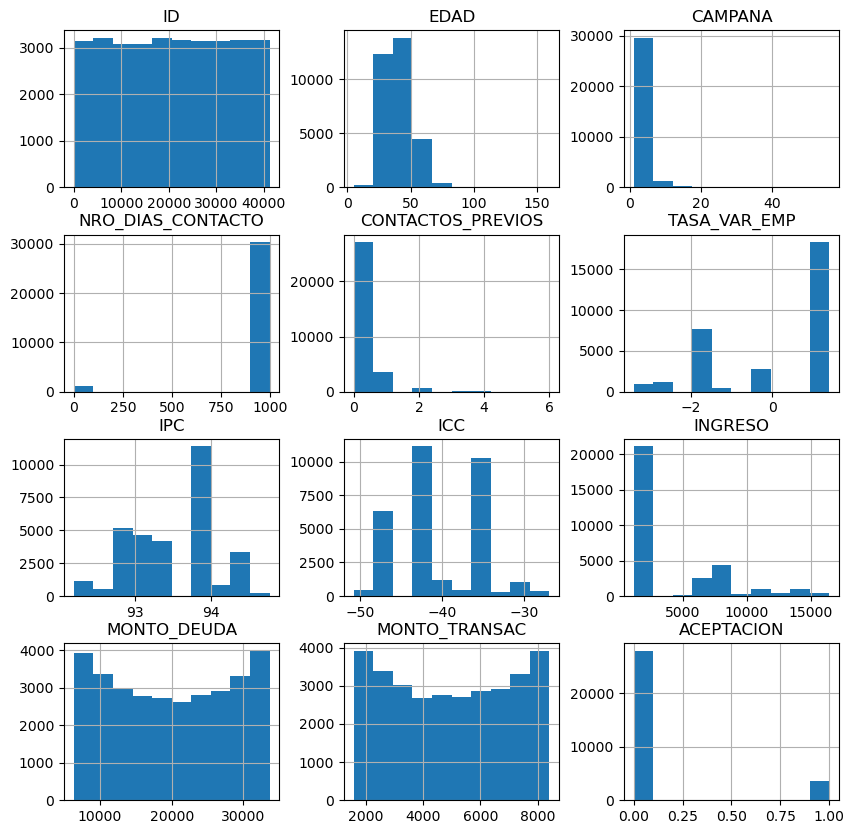

In [165]:
# histograms - Matplotlib
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
dataset[df_numericas].hist(ax=ax)
plt.show()

* Observamnos columnas con una distribución bimodal, como si estuvieran divididos en dos grupos, `MONTO_DEUDA`,`MONTO_TRANSAC`
* Se observan columnas con una pequeña distribución a la derecha como la `EDAD`, `CAMPANAS`, `CONTACTOS_PREVIOS`
* La variable `NRO_DIAS_CONTACTO`, posee un valor que indica que no hubo contacto(a mi criterio), y como ese valor representa más del 50% del total de datos para esa columna, lo mejor será eliminarlo.

### <font color="#004D7F"> Variables numéricas - Boxplots</font>

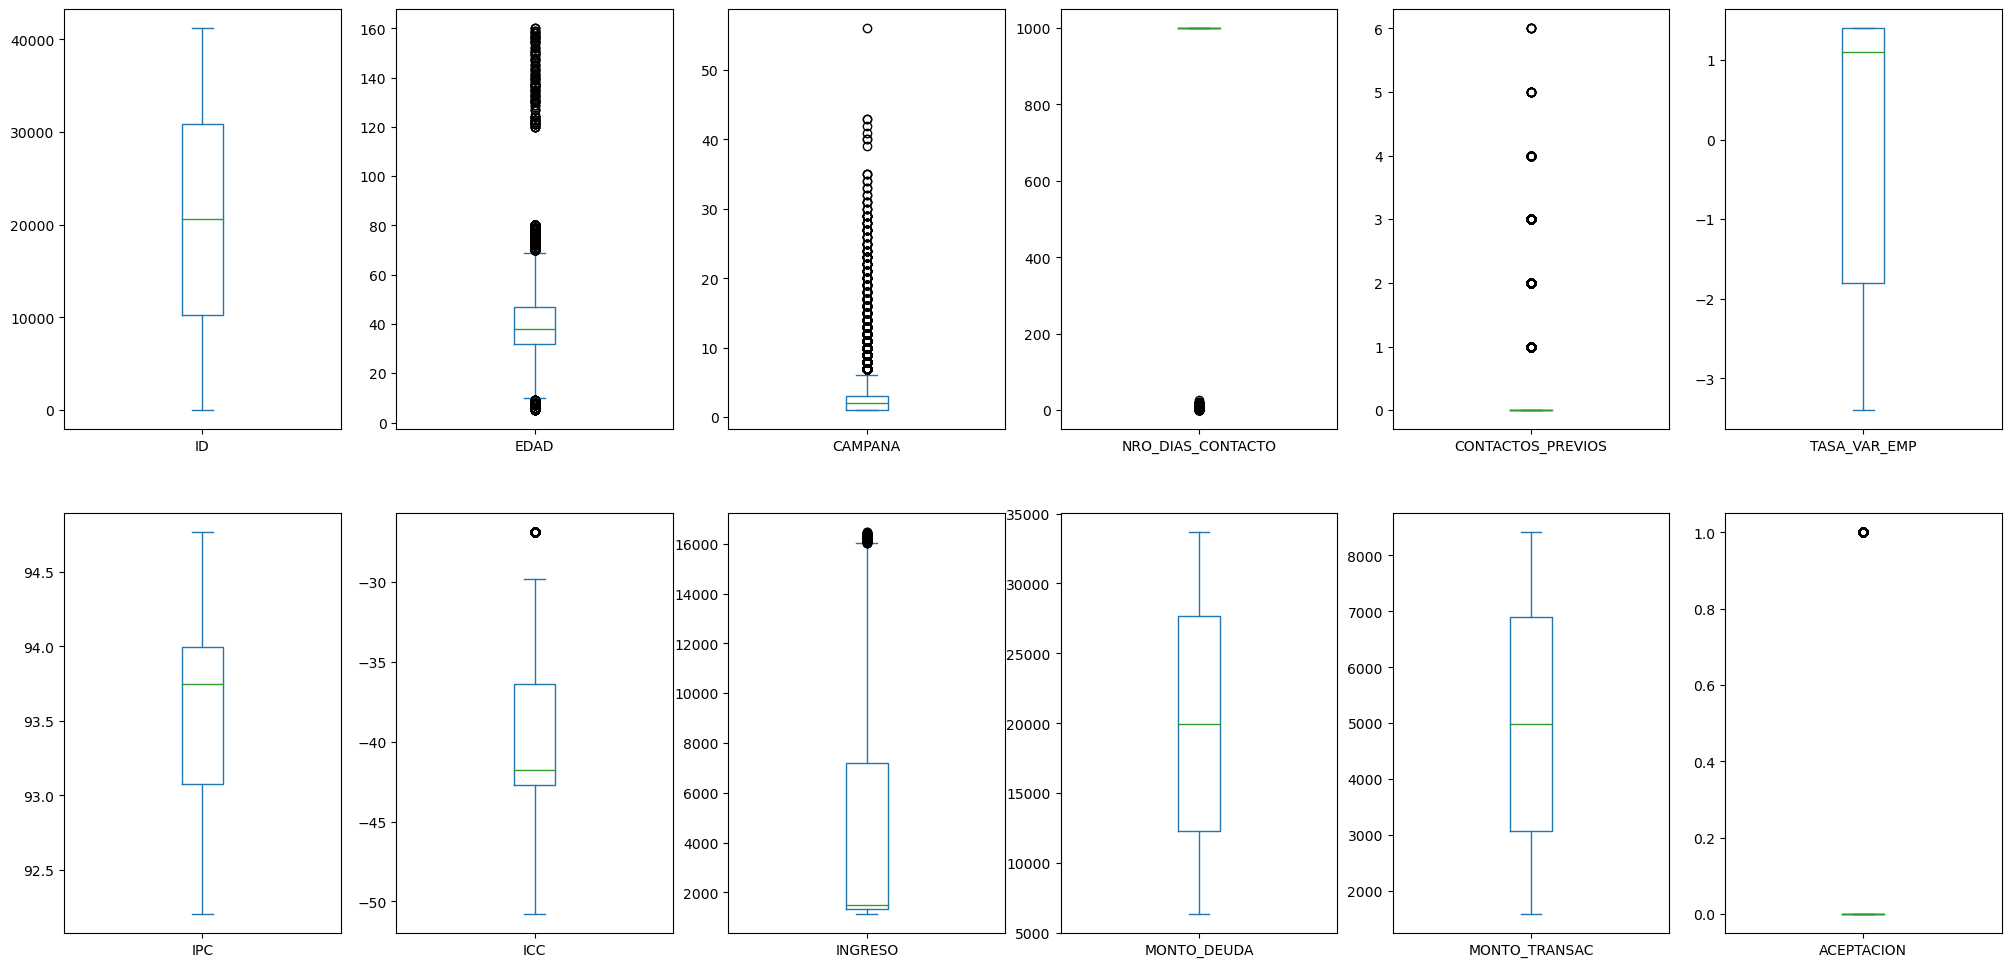

In [166]:
# box and whisker plots - Matplotlib
fig = plt.figure(figsize = (25,12))
ax = fig.gca()
(dataset.rename(columns=lambda x: str(x))
        .plot(ax=ax, kind= 'box', subplots=True, layout=(2,6))
)
plt.show()

* Se observan outlier en las variables `EDAD`, `CAMPANA`,`NRO_DIAS_CONTACTO`,' Y EN `INGRESOS`

### <font color="#004D7F"> Variables categóricas - Diagrama de barras</font>

In [167]:
def plot_categorical(data, height):
    '''
    This function plots categorical variables as bar charts with
    the % weight of each value on the bar
    '''
    cat_col = [col for col in data.columns if data[col].dtypes=='object']
    f, ax = plt.subplots(int(len(cat_col)/3), 3, figsize=(33,20)) 
    for i in range(len(cat_col)):
        count = data[cat_col[i]].value_counts(normalize=True).reset_index()
        sns.barplot(data=count,x='index',y=cat_col[i], ax=ax[i//3,i%3], edgecolor='white',linewidth=2,palette='dark')  
        ax[i//3,i%3].set_xlabel('')  
        ax[i//3,i%3].set_ylabel('') 
        ax[i//3,i%3].set_title(cat_col[i], size=15)  
        ax[i//3,i%3].tick_params('x', labelrotation=30, size=12)
        for j in count.index:
            ax[i//3,i%3].text(x=j,y=count[cat_col[i]][j]+height, s=str(round(count[cat_col[i]][j],2))+'%',ha="center", va="center", color="black",size=13)  # Modificado para acomodar 3 gráficos por fila
        f.suptitle('Column Distribution', y=0.98,ha='center',va='center',size=15, weight=150)
    plt.show()



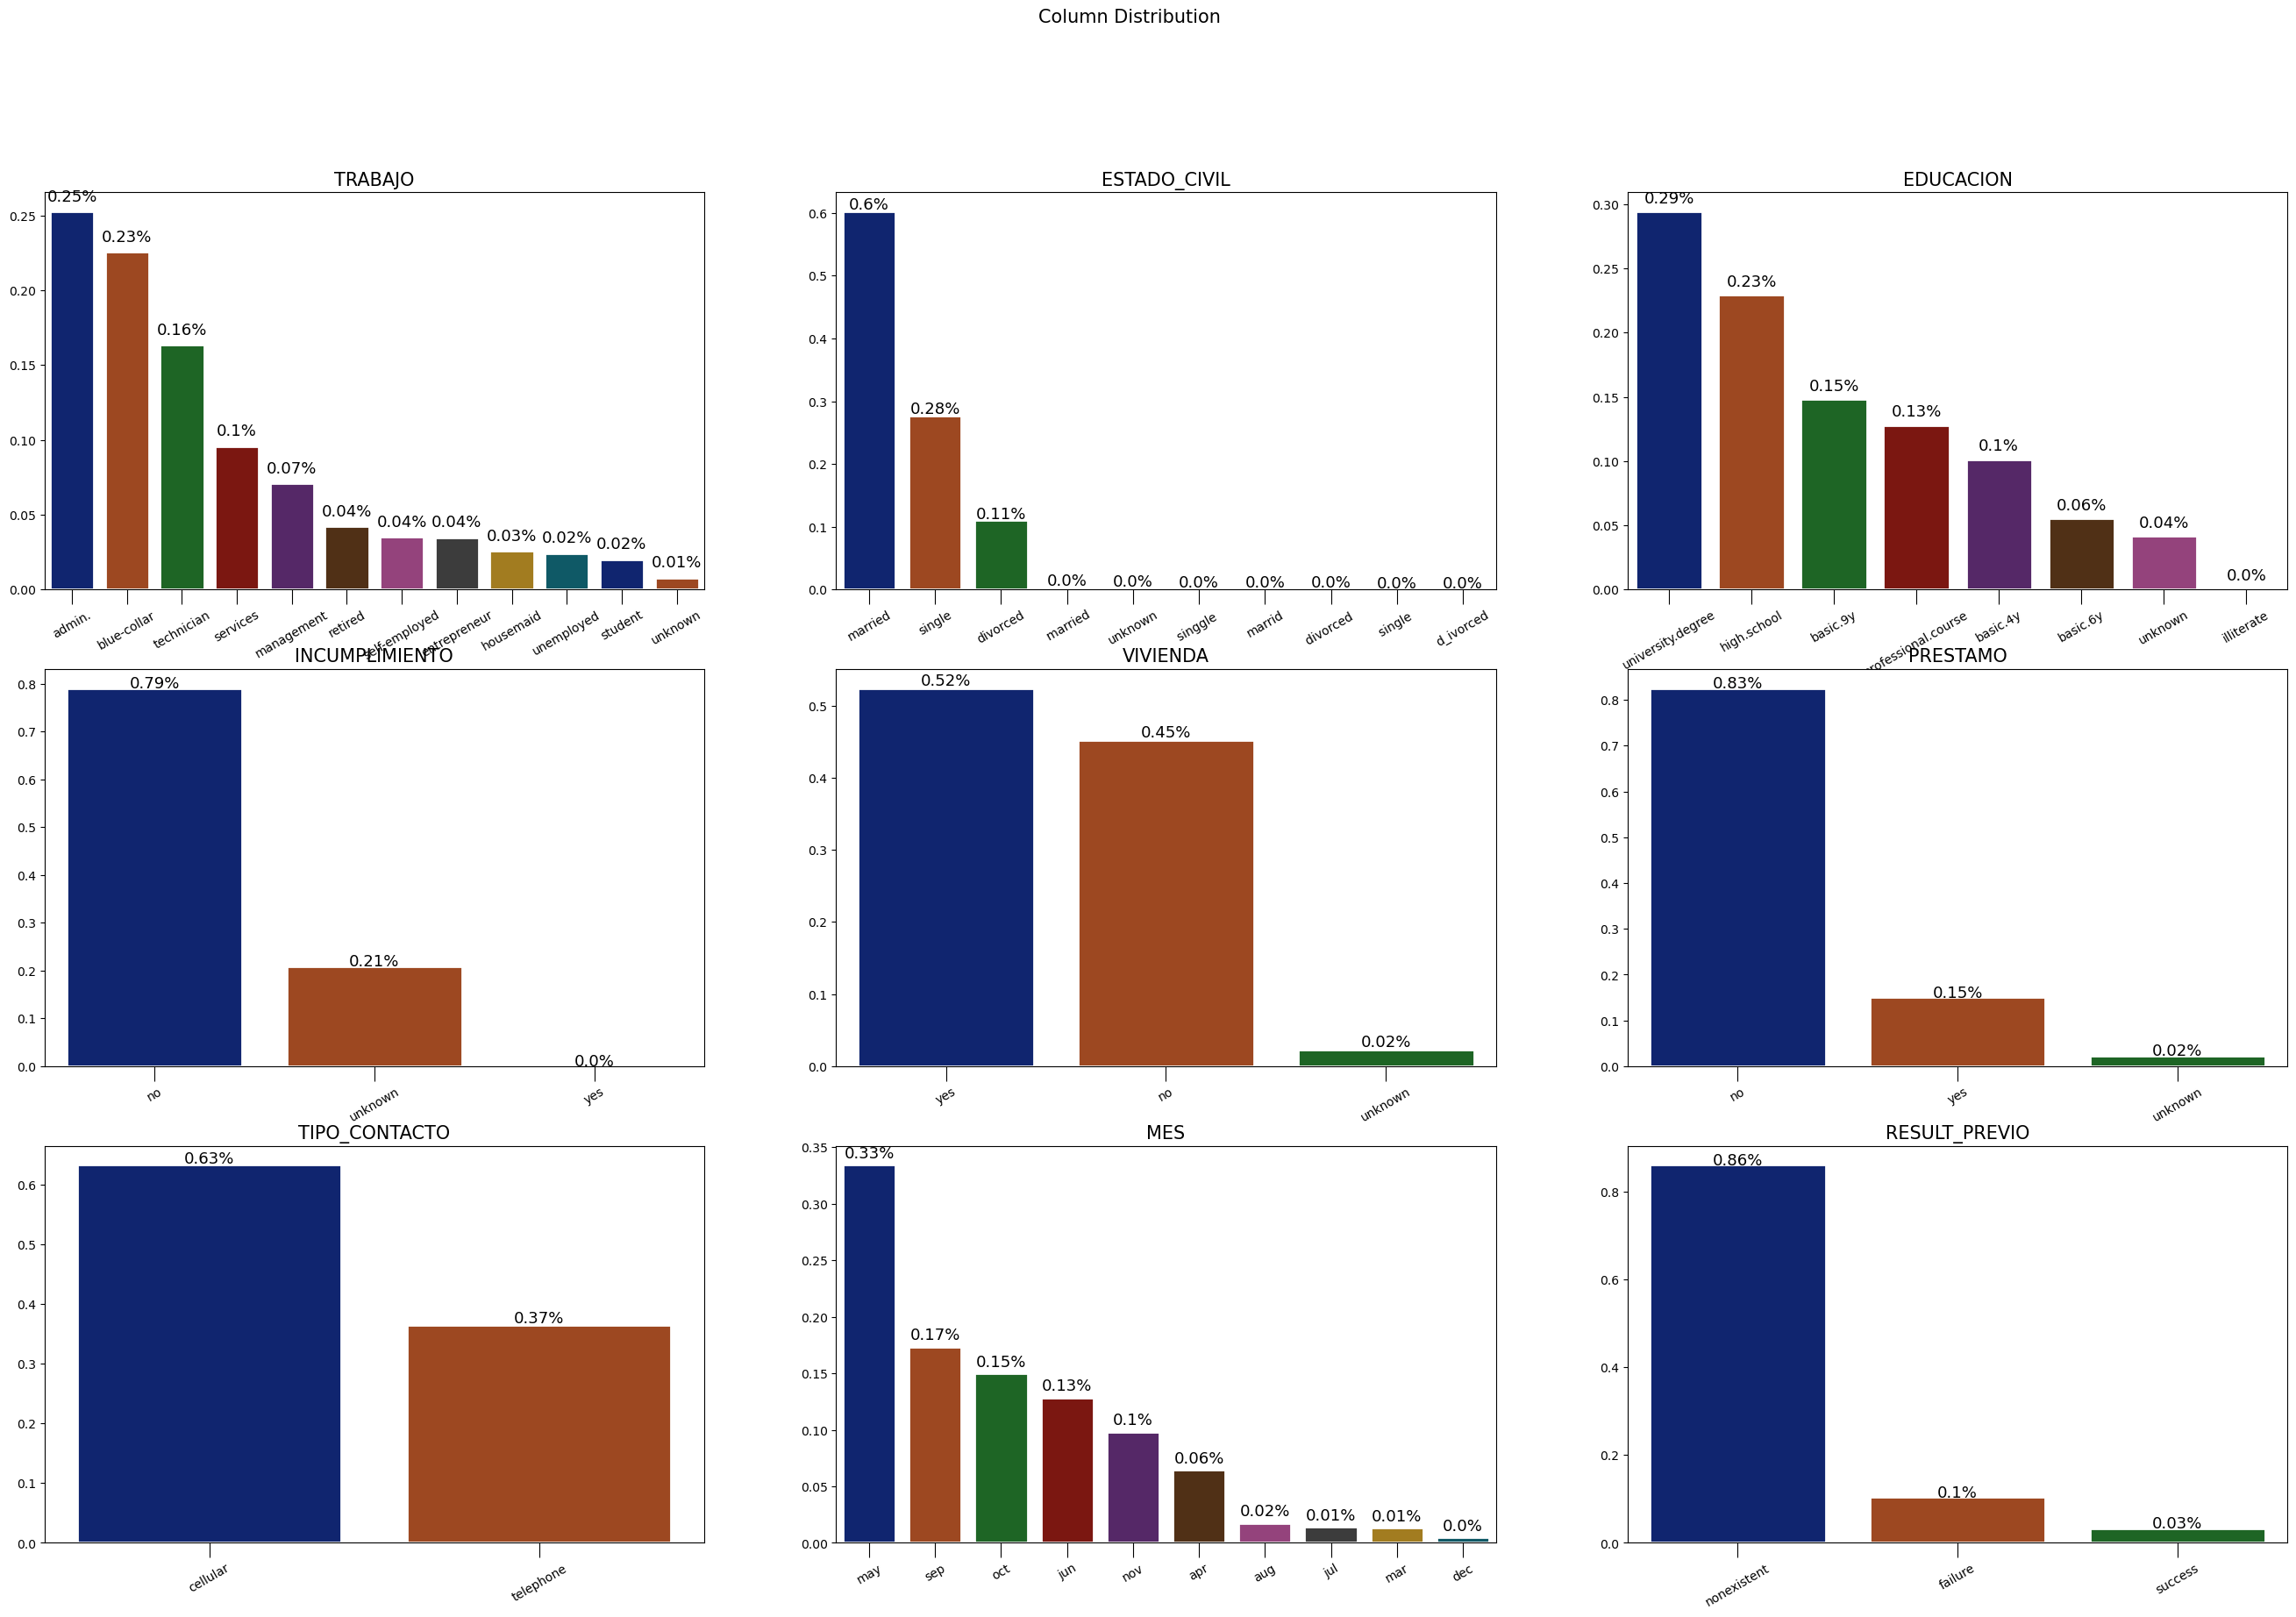

In [168]:
# Mostrando los graficos de las variables categoricas
plot_categorical(dataset[df_categoricas], 0.01)

* La variable `TRABAJO` presenta valores muy pequeños para houisemaid, unemployed, etudent, unknown; quizá se pueda juntar para una variable llamada "otros_trabajos"
* La variable `ESTADO_CIVIL` vemos categorias que se repiten y necesiten un tratamiento
* La variable `EDUCACION`, presenta valores bajo para basic.6y, unknown e ilitearate, juntar y formar una categoria llamada "otros_educacion"
* La variable `INCUMPLIMIENTO`, presenta una categoria "yes" en un 0%, esos pequeños valores seran agregador a la categoria "unknown" dado que no puedo agregarlo al campo contrario
* La variable `VIVIENDA`, presenta uns categoria "unknown" en un 0.02%, esos pequeños valores seran agregados a la categoria "yes" para no alterar la distribución
* La variable `PRESTAMO`, presenta una categoria "unknown" en un 0.02%, esos valores seran agregados a la categoria "no" para no alterar la distribución
* La variable `MES` se podría agrupal por trimestres para validar un comportamiento entre ellos, sin embargo no obtenemos los meses completos, por lo que voy a optar solo considerar los meses may, sep, oct, jun, nov, los demas meses los consideraré como "otros"
* La variable `RESULT_PREVIO`, no me brinda la información adecuada para el problema.

## <font color="#004D7F"> 3.2. Análisis multivariados</font>

<AxesSubplot:>

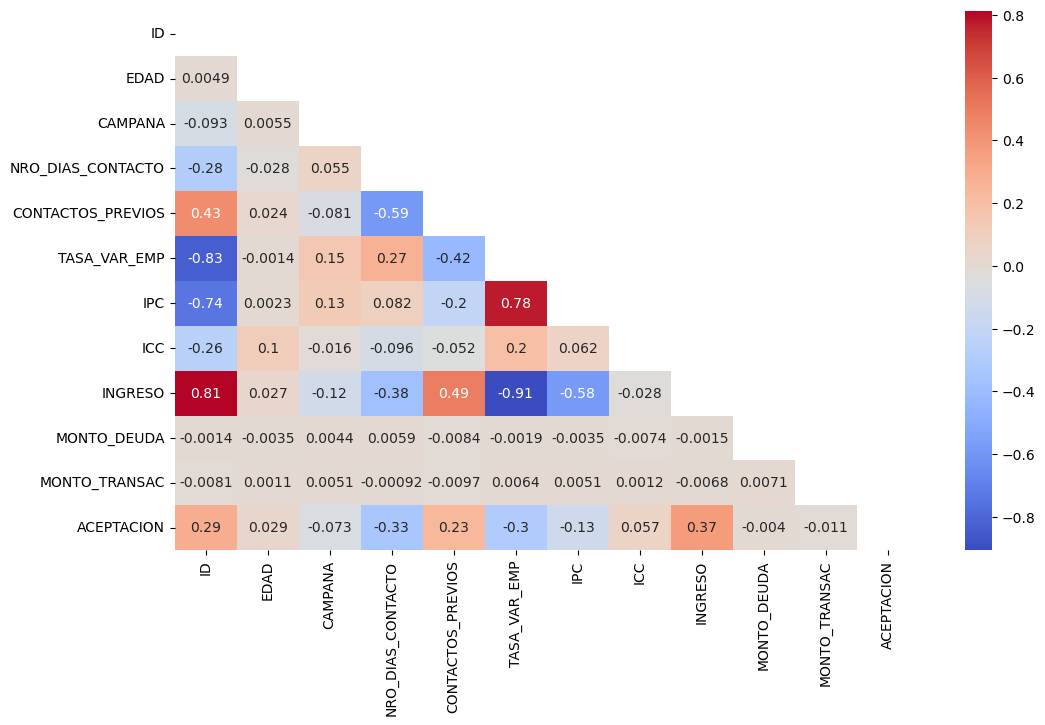

In [169]:
# Visualización de un headmap
plt.figure(figsize= (12,7))
correlaciones = dataset[df_numericas].corr()
correlaciones
upp_mat = np.triu(correlaciones)        #upp_mat, crea una matriz triangular superior a la matriz dada
sns.heatmap(correlaciones, annot = True, cmap = 'coolwarm', mask = upp_mat) 

* Podemos notar una alta correlacón entre las variables TASA_VAR_EMP con IPC e INGRESO

---

# <font color="#004D7F"> 4. Ingeniería de caracteristicas</font>
Aqui por lo general aplico la mayoria de las observaciones realizadas anteriormente

In [170]:
# copia para tratar los datos
df = dataset.copy()

In [171]:
# 1. Elimino va variable ID que no aporta nada de información al modelo, solo es un identificador
df = df.drop('ID', axis=1)

In [172]:
# 2. La variable TRABAJO presenta valores muy pequeños para  houisemaid, unemployed, etudent, unknown; quizá se pueda juntar para una variable llamada "otros_situacion_laboral"
print("ANTES")
print(df.TRABAJO.value_counts(), "\n")

df['TRABAJO'] = df['TRABAJO'].replace(['housemaid','unemployed','student','unknown'], 'otra_situacion_laboral')

print("DESPUES")
print(df['TRABAJO'].value_counts())

ANTES
admin.           7958
blue-collar      7106
technician       5147
services         3016
management       2233
retired          1330
self-employed    1110
entrepreneur     1103
housemaid         814
unemployed        770
student           637
unknown           254
Name: TRABAJO, dtype: int64 

DESPUES
admin.                    7958
blue-collar               7106
technician                5147
services                  3016
otra_situacion_laboral    2475
management                2233
retired                   1330
self-employed             1110
entrepreneur              1103
Name: TRABAJO, dtype: int64


In [173]:
#  3. La variable `ESTADO_CIVIL` vemos subcategorias que se repiten y necesiten un tratamiento
df['ESTADO_CIVIL'].unique()

array(['single', 'married', 'divorced', 'marrid', ' married', 'divorced ',
       'singgle ', 'unknown', 'single ', 'd_ivorced'], dtype=object)

In [174]:
df['ESTADO_CIVIL'] = df['ESTADO_CIVIL'].str.strip() # quitamos los espacios en blanco
df['ESTADO_CIVIL'].unique()

array(['single', 'married', 'divorced', 'marrid', 'singgle', 'unknown',
       'd_ivorced'], dtype=object)

In [175]:
reemplazos = {
    'marrid': 'married',
    'singgle': 'single',
    'd_ivorced': 'divorced'
}

df['ESTADO_CIVIL'] = df['ESTADO_CIVIL'].replace(reemplazos)
        
print(df['ESTADO_CIVIL'].value_counts())

married     19111
single       8797
divorced     3508
unknown        62
Name: ESTADO_CIVIL, dtype: int64


<AxesSubplot:>

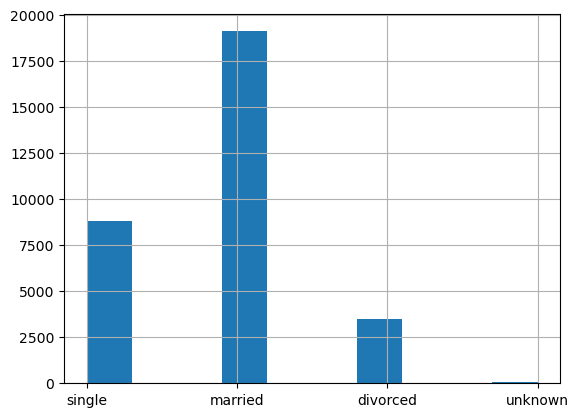

In [176]:
df['ESTADO_CIVIL'].hist()

* notamos que la subcategoría "unknown" tiene una cantidad muy baja con respecto a los demas, entonces vamos a juntarlo con el que tiene más valores "married"

In [177]:
df['ESTADO_CIVIL'] = df['ESTADO_CIVIL'].replace('unknown', 'married')
print(df['ESTADO_CIVIL'].value_counts())

married     19173
single       8797
divorced     3508
Name: ESTADO_CIVIL, dtype: int64


In [178]:
# 4. La variable EDUCACION, presenta valores bajo para basic.6y, unknown e ilitearate
print("ANTES")
print(df['EDUCACION'].value_counts(), "\n")

df['EDUCACION'] = df['EDUCACION'].replace(['basic.6y','unknown','illiterate'], 'otra_eduacion')

print("DESPUES")
print(df['EDUCACION'].value_counts())

ANTES
university.degree      9266
high.school            7228
basic.9y               4669
professional.course    4035
basic.4y               3197
basic.6y               1751
unknown                1315
illiterate               17
Name: EDUCACION, dtype: int64 

DESPUES
university.degree      9266
high.school            7228
basic.9y               4669
professional.course    4035
basic.4y               3197
otra_eduacion          3083
Name: EDUCACION, dtype: int64


In [179]:
# 5. La variable INCUMPLIMIENTO, presenta una subcategoria "yes" en un 0%, esos pequeños valores seran agregador a la subcategoria "unknown" dado que no puedo agregarlo al campo contrario
df['INCUMPLIMIENTO'].value_counts()

no         24909
unknown     6566
yes            3
Name: INCUMPLIMIENTO, dtype: int64

In [180]:
df['INCUMPLIMIENTO'] = df['INCUMPLIMIENTO'].replace('yes', 'unknown')
df['INCUMPLIMIENTO'].value_counts()

no         24909
unknown     6569
Name: INCUMPLIMIENTO, dtype: int64

In [181]:
# 6. La variable VIVIENDA, presenta uns subcategoria "unknown" en un 0.02%, esos pequeños valores seran agregados a la subcategoria "yes" para no alterar la distribución
df['VIVIENDA'].value_counts()

yes        16507
no         14233
unknown      738
Name: VIVIENDA, dtype: int64

In [182]:
df['VIVIENDA'] = df['VIVIENDA'].replace('unknown', 'yes')
df['VIVIENDA'].value_counts()

yes    17245
no     14233
Name: VIVIENDA, dtype: int64

In [183]:
# 7. La variable PRESTAMO, presenta una subcategoria "unknown" en un 0.02%, esos valores seran agregados a la subcategoria "no" para no alterar la distribución
df['PRESTAMO'].value_counts()

no         25997
yes         4743
unknown      738
Name: PRESTAMO, dtype: int64

In [184]:
df['PRESTAMO'] = df['PRESTAMO'].replace('unknown', 'no')
df['PRESTAMO'].value_counts()

no     26735
yes     4743
Name: PRESTAMO, dtype: int64

In [185]:
# 8. La variable MES se podría agrupal por trimestres para validar un comportamiento entre ellos, sin embargo no obtenemos los meses completos, 
# por lo que voy a optar solo considerar los meses may, sep, oct, jun, nov,apr los demas meses los consideraré como "otros"
df['MES'].value_counts()

may    10535
sep     5463
oct     4721
jun     4047
nov     3099
apr     2030
aug      559
jul      441
mar      430
dec      153
Name: MES, dtype: int64

In [186]:
df['MES'] = df['MES'].replace(['aug','jul','mar','dec'], 'otro_mes')
df['MES'].value_counts()

may         10535
sep          5463
oct          4721
jun          4047
nov          3099
apr          2030
otro_mes     1583
Name: MES, dtype: int64

In [187]:
# La variable RESULT_PREVIO, no me brinda la información adecuada para el problema
df['RESULT_PREVIO'].value_counts()

nonexistent    27136
failure         3281
success         1061
Name: RESULT_PREVIO, dtype: int64

* Esta variable nos da la información de como ha sido el cliente en la campaña anterior, nos damos cuenta que la información que nos brinda son valores de si o no, en caso contrario a que no haya contestado. Notamos que en su mayoria el cliente no ha contestado la llamada o se nego a dar una respuesta, por lo tanto considero que esta columna no me va a brindar información para el objetivo principal del problema

In [188]:
df = df.drop(['RESULT_PREVIO'], axis=1)

In [189]:
# La variable NRO_DIAS_CONTACTO, posee un valor que indica que no hubo contacto(a mi criterio), y como ese valor representa más del 50% del total de datos para esa columna, lo mejor será eliminarlo.
df = df.drop(['NRO_DIAS_CONTACTO'], axis=1)

--- 

# <font color="#004D7F"> 5. Tratamiento de los datos</font>

## <font color="#004D7F"> 5.1 Tratamiento de variables categóricas</font>

In [190]:
# copia de la data anterior
df2 = df.copy()

In [191]:
#selección de variables categóricas y numericas
df2_categoricas = df2.select_dtypes(include=['object']).columns.to_list()
df2_numericas = df2.select_dtypes(include=['float64', 'int64']).columns.to_list()

print("\033[1m" + 'Variables categoricas' + "\033[0m\n", df2_categoricas)
print("\033[1m" + 'Variables numericas' + "\033[0m\n", df2_numericas)


Variables categoricas
 ['TRABAJO', 'ESTADO_CIVIL', 'EDUCACION', 'INCUMPLIMIENTO', 'VIVIENDA', 'PRESTAMO', 'TIPO_CONTACTO', 'MES']
Variables numericas
 ['EDAD', 'CAMPANA', 'CONTACTOS_PREVIOS', 'TASA_VAR_EMP', 'IPC', 'ICC', 'INGRESO', 'MONTO_DEUDA', 'MONTO_TRANSAC', 'ACEPTACION']


In [192]:
df_cat = pd.get_dummies(df2, columns = ['TRABAJO','ESTADO_CIVIL','EDUCACION', 'INCUMPLIMIENTO','VIVIENDA','PRESTAMO','TIPO_CONTACTO','MES'], drop_first=True)   #drop_first=True, Elimina la columna con las variables categoricas para dar paso a las columnas con variables numericas
df_cat = df_cat.drop(df2_numericas,axis=1) # Eliminando las columnas que no fueron cambiadas
df_cat

,TRABAJO_blue-collar,TRABAJO_entrepreneur,TRABAJO_management,TRABAJO_otra_situacion_laboral,TRABAJO_retired,TRABAJO_self-employed,TRABAJO_services,TRABAJO_technician,ESTADO_CIVIL_married,ESTADO_CIVIL_single,EDUCACION_basic.9y,EDUCACION_high.school,EDUCACION_otra_eduacion,EDUCACION_professional.course,EDUCACION_university.degree,INCUMPLIMIENTO_unknown,VIVIENDA_yes,PRESTAMO_yes,TIPO_CONTACTO_telephone,MES_jun,MES_may,MES_nov,MES_oct,MES_otro_mes,MES_sep
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31473,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
31474,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
31475,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
31476,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


## <font color="#004D7F"> 5.1 Tratamiento de variables continuas</font>

In [193]:
# Separamos las columnas categoricas del target
df_num = df2[df2_numericas]
target = df_num['ACEPTACION']
df_num = df_num.drop(['ACEPTACION'],axis=1)

In [194]:
df_num

,EDAD,CAMPANA,CONTACTOS_PREVIOS,TASA_VAR_EMP,IPC,ICC,INGRESO,MONTO_DEUDA,MONTO_TRANSAC
0,27,1,0,-0.1,93.798,-40.4,1285.0,24260.770530,5242.101608
1,43,1,0,-0.1,93.798,-40.4,1287.0,28980.094570,5538.942316
2,44,1,0,-0.1,93.798,-40.4,1153.0,10937.494260,7630.664800
3,46,1,0,-0.1,93.798,-40.4,1125.0,29232.603680,7008.855259
4,42,1,0,-0.1,93.798,-40.4,1443.0,32636.302790,3012.416629
...,...,...,...,...,...,...,...,...,...
31473,56,1,1,-1.8,93.369,-34.8,16178.0,12775.634390,7898.585641
31474,56,1,1,-1.8,93.369,-34.8,16373.0,8598.471103,2872.732652
31475,56,1,1,-1.8,93.369,-34.8,16463.0,10292.031260,1787.767146
31476,64,2,0,-1.8,93.369,-34.8,16102.0,30125.652460,6309.825501


* Debido a que los valores numéricos estan en diferentes escalas, vamos a aplicar el escalado Min-Max

In [195]:
# Aplicamos la estandarización
scaler = MinMaxScaler()
df_num_scaled = scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(df_num_scaled, columns=df_num.columns)
df_num_scaled

,EDAD,CAMPANA,CONTACTOS_PREVIOS,TASA_VAR_EMP,IPC,ICC,INGRESO,MONTO_DEUDA,MONTO_TRANSAC
0,0.141935,0.000000,0.000000,0.687500,0.622369,0.435146,0.010432,0.656028,0.535480
1,0.245161,0.000000,0.000000,0.687500,0.622369,0.435146,0.010562,0.828853,0.578963
2,0.251613,0.000000,0.000000,0.687500,0.622369,0.435146,0.001826,0.168119,0.885377
3,0.264516,0.000000,0.000000,0.687500,0.622369,0.435146,0.000000,0.838100,0.794289
4,0.238710,0.000000,0.000000,0.687500,0.622369,0.435146,0.020733,0.962746,0.208856
...,...,...,...,...,...,...,...,...,...
31473,0.329032,0.000000,0.166667,0.333333,0.455183,0.669456,0.981419,0.235434,0.924624
31474,0.329032,0.000000,0.166667,0.333333,0.455183,0.669456,0.994132,0.082463,0.188394
31475,0.329032,0.000000,0.166667,0.333333,0.455183,0.669456,1.000000,0.144482,0.029459
31476,0.380645,0.018182,0.000000,0.333333,0.455183,0.669456,0.976464,0.870804,0.691889


In [196]:
df_final = pd.concat([df_num_scaled, df_cat, target], axis=1)
df_final

,EDAD,CAMPANA,CONTACTOS_PREVIOS,TASA_VAR_EMP,IPC,ICC,INGRESO,MONTO_DEUDA,MONTO_TRANSAC,TRABAJO_blue-collar,TRABAJO_entrepreneur,TRABAJO_management,TRABAJO_otra_situacion_laboral,TRABAJO_retired,TRABAJO_self-employed,TRABAJO_services,TRABAJO_technician,ESTADO_CIVIL_married,ESTADO_CIVIL_single,EDUCACION_basic.9y,EDUCACION_high.school,EDUCACION_otra_eduacion,EDUCACION_professional.course,EDUCACION_university.degree,INCUMPLIMIENTO_unknown,VIVIENDA_yes,PRESTAMO_yes,TIPO_CONTACTO_telephone,MES_jun,MES_may,MES_nov,MES_oct,MES_otro_mes,MES_sep,ACEPTACION
0,0.141935,0.000000,0.000000,0.687500,0.622369,0.435146,0.010432,0.656028,0.535480,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,0.245161,0.000000,0.000000,0.687500,0.622369,0.435146,0.010562,0.828853,0.578963,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,0.251613,0.000000,0.000000,0.687500,0.622369,0.435146,0.001826,0.168119,0.885377,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
3,0.264516,0.000000,0.000000,0.687500,0.622369,0.435146,0.000000,0.838100,0.794289,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
4,0.238710,0.000000,0.000000,0.687500,0.622369,0.435146,0.020733,0.962746,0.208856,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31473,0.329032,0.000000,0.166667,0.333333,0.455183,0.669456,0.981419,0.235434,0.924624,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
31474,0.329032,0.000000,0.166667,0.333333,0.455183,0.669456,0.994132,0.082463,0.188394,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
31475,0.329032,0.000000,0.166667,0.333333,0.455183,0.669456,1.000000,0.144482,0.029459,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
31476,0.380645,0.018182,0.000000,0.333333,0.455183,0.669456,0.976464,0.870804,0.691889,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [197]:
df_final.shape

(31478, 35)

---

# <font color="#004D7F"> 6. Fase de modelado</font>

## <font color="#004D7F"> 6.1 Crear conjunto de validación</font>

In [198]:
X = df_final.drop('ACEPTACION', axis=1)
y = df_final['ACEPTACION']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25182, 34)
(25182,)
(6296, 34)
(6296,)


## <font color="#004D7F"> 6.2 Evaluación de línea base</font>

No sabemos qué algoritmos funcionarán bien en este conjunto de datos. Podemos intuir que algoritmos basados en la distancia como 
-NN y SVM pueden funcionar bien. Utilizaremos la validación cruzada 10 veces. El conjunto de datos no es demasiado pequeño y esta es una buena configuración estándar.

In [199]:
num_folds = 10
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

Todos los algoritmos usan hiperparámetros predeterminados. Comparemos los algoritmos. Mostraremos la media y la desviación estándar de Accuracy para cada algoritmo a medida que lo calculemos y recopilemos los resultados para su uso posterior.

In [200]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=22, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

LR: 89.14% (0.53%)
LDA: 88.45% (0.46%)
KNN: 88.60% (0.45%)
CART: 83.73% (0.50%)
NB: 84.10% (0.54%)
SVM: 89.31% (0.49%)


* Estos son solo valores medios de Accuracy. Siempre es aconsejable observar la distribución de los valores de Accuracy calculados en los folds de validación cruzada. Podemos hacerlo gráficamente usando Boxplot.

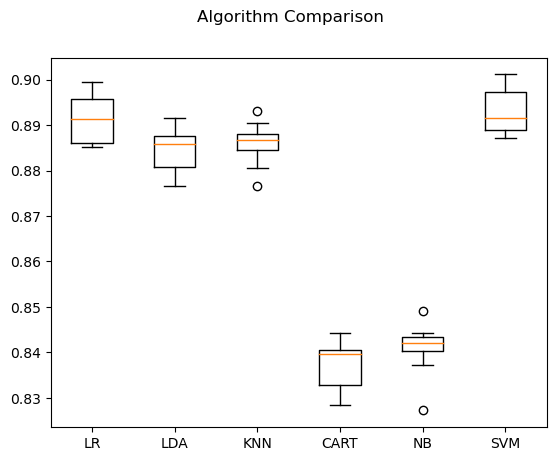

In [201]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

* Voy a escoger a SVM y a KNN porque tiene buenos resultados y ademas de puede optimizar gracias a que ellos manejar parametros de optimización

## <font color="#004D7F"> 6.2 Evaluación con balanceo de pesos</font>

In [202]:
# aplicamos el metodo del desbalanceo
print(y_train.shape[0] - y_train.sum())
print(y_train.sum())
print((y_train.shape[0] - y_train.sum())/y_train.sum())

22360
2822
7.923458540042523


In [203]:
num_folds = 10
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(class_weight = {0:1, 1:7.923})))
models.append(('CART', DecisionTreeClassifier(class_weight = {0:1, 1:7.923})))
models.append(('SVM', SVC(class_weight = {0:1, 1:7.923})))

In [204]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=22, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

LR: 80.63% (0.60%)
CART: 84.29% (0.70%)
SVM: 82.40% (0.64%)


* No se ve mejora con respecto a el balanceo de pesos

---

# <font color="#004D7F"> 7. Fase de optimización</font>

## <font color="#004D7F">7.2 Optimización de SVM</font>

* Podemos ajustar dos parámetros clave del algoritmo SVM, el valor de C (cuánto relajar el margen) y el tipo de kernel. El valor predeterminado para SVM (la clase SVC) es usar el kernel de la función de base radial (RBF) con un valor de C establecido en 1.0. Realizaremos un GridSearchCV utilizando una validación cruzada de 10 del conjunto de datos de entrenamiento. Intentaremos una serie de tipos de kernel más simples y valores de C con menos sesgo y más sesgo (menor que y más de 1.0 respectivamente
* Vamos a tener en cuenta tambien el desbalanceo de clases que habia inicialmente

In [56]:
# tumeamos el algoritmo SVM
scoring = 'accuracy'

c_values = [1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'rbf', 'sigmoid']

param_grid = dict(C=c_values, kernel=kernel_values)

model = SVC()

kfold = KFold(n_splits=10, random_state=22, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Mejor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{param}: {mean*100.0:,.2f}% ({stdev*100.0:,.2f}%)")

Mejor: 0.900445 usando {'C': 1.3, 'kernel': 'rbf'}
{'C': 1.0, 'kernel': 'linear'}: 89.88% (0.66%)
{'C': 1.0, 'kernel': 'rbf'}: 90.00% (0.66%)
{'C': 1.0, 'kernel': 'sigmoid'}: 83.76% (0.91%)
{'C': 1.3, 'kernel': 'linear'}: 89.88% (0.66%)
{'C': 1.3, 'kernel': 'rbf'}: 90.04% (0.65%)
{'C': 1.3, 'kernel': 'sigmoid'}: 83.85% (1.04%)
{'C': 1.5, 'kernel': 'linear'}: 89.88% (0.66%)
{'C': 1.5, 'kernel': 'rbf'}: 90.04% (0.63%)
{'C': 1.5, 'kernel': 'sigmoid'}: 83.49% (0.88%)
{'C': 1.7, 'kernel': 'linear'}: 89.88% (0.66%)
{'C': 1.7, 'kernel': 'rbf'}: 90.03% (0.62%)
{'C': 1.7, 'kernel': 'sigmoid'}: 83.63% (1.01%)
{'C': 2.0, 'kernel': 'linear'}: 89.88% (0.66%)
{'C': 2.0, 'kernel': 'rbf'}: 90.04% (0.60%)
{'C': 2.0, 'kernel': 'sigmoid'}: 83.69% (1.02%)


* Por mas optimización que hagamos a los parametros nos data un promedio de 0.90 d accuracy

# <font color="#004D7F"> 8. Algoritmos ensamblados</font>

Otra forma en que podemos mejorar el rendimiento de los algoritmos en este problema es mediante el uso de modelos ensamblados.
* Métodos Boosting: AdaBoost (AB) y Gradient Boosting (GBM),XGBoost.
* Métodos Bagging: Random Forest (RF) y Extra Trees (ET).

In [212]:
# Metodos ensamblados
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
ensembles.append(('XGB', XGBClassifier()))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=22, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

AB: 89.14% (0.47%)
GBM: 89.52% (0.41%)
RF: 89.58% (0.42%)
ET: 89.37% (0.42%)
XGB: 89.19% (0.56%)


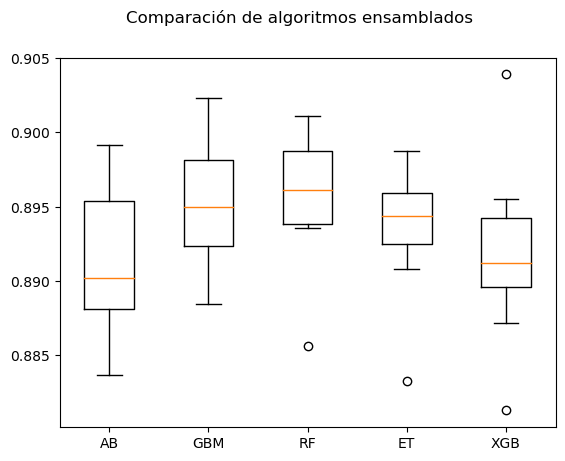

In [213]:
# Comparamos algoritmos
fig = plt.figure()
fig.suptitle('Comparación de algoritmos ensamblados')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

* En este caso a seleccionar a Random forest y a Gradient boosting como mejores algoritmos

---

# <font color="#004D7F"> 8. Fase de Testeo</font>

Se encontró tres modelos con similares promedios de accuracy y vamos a utilizar los datos de prueba

In [214]:
# SVM
model = SVC(C=1.3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.894853875476493
[[5492   92]
 [ 570  142]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5584
           1       0.61      0.20      0.30       712

    accuracy                           0.89      6296
   macro avg       0.76      0.59      0.62      6296
weighted avg       0.87      0.89      0.87      6296



In [215]:
# GBM
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8934243964421855
[[5466  118]
 [ 553  159]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5584
           1       0.57      0.22      0.32       712

    accuracy                           0.89      6296
   macro avg       0.74      0.60      0.63      6296
weighted avg       0.87      0.89      0.87      6296



In [216]:
# RF
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8932655654383735
[[5444  140]
 [ 532  180]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5584
           1       0.56      0.25      0.35       712

    accuracy                           0.89      6296
   macro avg       0.74      0.61      0.65      6296
weighted avg       0.87      0.89      0.87      6296



**Observacion**
* Dado que mi objetivo principal es encontrar a las personas que sean más probables de aceptar una oferta laboral, entonces voy a utilizar el recall (identifica correctamente la mayoria de los "1"). El que tiene mayor recall es el modelo de Random Forest.

In [218]:
# Obtén la importancia de las características
importances = model.feature_importances_
indices = np.argsort(importances)
feature_names = X_train.columns

# Muestra las características más importantes
print("Características más importantes:")
for i in indices[::-1]:
    print(f"{feature_names[i]}: {importances[i]}")

Características más importantes:
INGRESO: 0.19038398164775705
MONTO_TRANSAC: 0.1310653135334831
MONTO_DEUDA: 0.12918015881157968
EDAD: 0.10840999157961832
CAMPANA: 0.048849038217058535
ICC: 0.04029020066438819
TASA_VAR_EMP: 0.03896942939590545
CONTACTOS_PREVIOS: 0.03175038897534199
IPC: 0.029696658039297344
MES_otro_mes: 0.02518179379044361
VIVIENDA_yes: 0.021677992444531394
PRESTAMO_yes: 0.015335839943051394
EDUCACION_university.degree: 0.014405293118505406
ESTADO_CIVIL_married: 0.014044735489274304
EDUCACION_high.school: 0.01319734765088704
TIPO_CONTACTO_telephone: 0.013133829251809552
TRABAJO_technician: 0.012472553971709495
ESTADO_CIVIL_single: 0.012398530953970591
EDUCACION_professional.course: 0.010838035251710376
TRABAJO_blue-collar: 0.009872839296062098
INCUMPLIMIENTO_unknown: 0.009811254056473253
TRABAJO_otra_situacion_laboral: 0.00967792594105714
EDUCACION_basic.9y: 0.009151348452437532
EDUCACION_otra_eduacion: 0.008938142854948997
TRABAJO_management: 0.008094817560408132
TRA

**Conclusiones**
* `INGRESO` es la característica más importante en tu modelo, seguida de 'MONTO_TRANSAC' y 'MONTO_DEUDA'. Estos parecen ser los factores más significativos que tu modelo considera al hacer una predicción.
* `EDAD` también parece ser un factor significativo.
* Las característica relacionada con el contacto con el cliente como  y `CAMPANA`, también se consideran bastante importantes.
* Algunas características, como `TRABAJO_entrepreneur`, `MES_oct`,`MES_jun`, `MES_sep`, `MES_nov`, tienen coeficientes de importancia bastante bajos. Esto significa que estas características no influyen mucho en las decisiones del modelo.

---

# <font color="#004D7F"> EXPORTAR EL MODELO</font>

In [219]:
import pickle as pkl

filename = 'modeloFinal.sav'
pkl.dump(model, open(filename, 'wb'))

In [220]:
# Cargar el modelo
loaded_model = pkl.load(open(filename, 'rb'))
results = loaded_model.score(X_test, y_test)

print(f"Acurracy: {results.mean()}")

Acurracy: 0.8932655654383735
